# importing neccessary libraries

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("Desktop/project_dataset/Sales.csv")

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [7]:
df.shape


(9723, 6)

In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [15]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"
9722,150501,Google Phone,1,600,01/13/19 16:43,"428 Cedar St, Boston, MA 02215"


# cleaning

In [10]:
df.isnull().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [16]:
df["Product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', 'Product'], dtype=object)

In [36]:
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [34]:
df = df[df["Price Each"]!="Price Each"]#removing unnecesary row

In [37]:
df["Price Each"].dtype

dtype('float64')

In [38]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [39]:
df["Quantity Ordered"].dtype

dtype('int64')

In [40]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [41]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

# create total sells column

In [42]:
df["total_sell"] = df["Quantity Ordered"] *df["Price Each"]

In [43]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sell
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


,Quantity Ordered,Price Each,total_sell
Product,,,
Macbook Pro Laptop,235,399500.00,399500.00
iPhone,379,265300.00,265300.00
ThinkPad Laptop,217,215997.84,216997.83
Google Phone,318,190200.00,190800.00
Apple Airpods Headphones,814,121350.00,122100.00
27in 4K Gaming Monitor,312,121676.88,121676.88
34in Ultrawide Monitor,314,118936.87,119316.86
Flatscreen TV,243,72900.00,72900.00
Bose SoundSport Headphones,659,65593.44,65893.41


In [113]:
answer = df.groupby(df["Product"]).sum().sort_values(by="total_sell", ascending=False)


In [114]:
answer

,Quantity Ordered,Price Each,total_sell
Product,,,
Macbook Pro Laptop,235,399500.00,399500.00
iPhone,379,265300.00,265300.00
ThinkPad Laptop,217,215997.84,216997.83
Google Phone,318,190200.00,190800.00
Apple Airpods Headphones,814,121350.00,122100.00
27in 4K Gaming Monitor,312,121676.88,121676.88
34in Ultrawide Monitor,314,118936.87,119316.86
Flatscreen TV,243,72900.00,72900.00
Bose SoundSport Headphones,659,65593.44,65893.41


# 	Total sales for each product

In [122]:
#answer = answer.reset_index()
answer = answer.reset_index(drop=True)
answer

,Product,Quantity Ordered,Price Each,total_sell
0,Macbook Pro Laptop,235,399500.00,399500.00
1,iPhone,379,265300.00,265300.00
2,ThinkPad Laptop,217,215997.84,216997.83
3,Google Phone,318,190200.00,190800.00
4,Apple Airpods Headphones,814,121350.00,122100.00
5,27in 4K Gaming Monitor,312,121676.88,121676.88
6,34in Ultrawide Monitor,314,118936.87,119316.86
7,Flatscreen TV,243,72900.00,72900.00
8,Bose SoundSport Headphones,659,65593.44,65893.41
9,27in FHD Monitor,419,62695.82,62845.81


Text(0.5, 1.0, 'Most Sell Item')

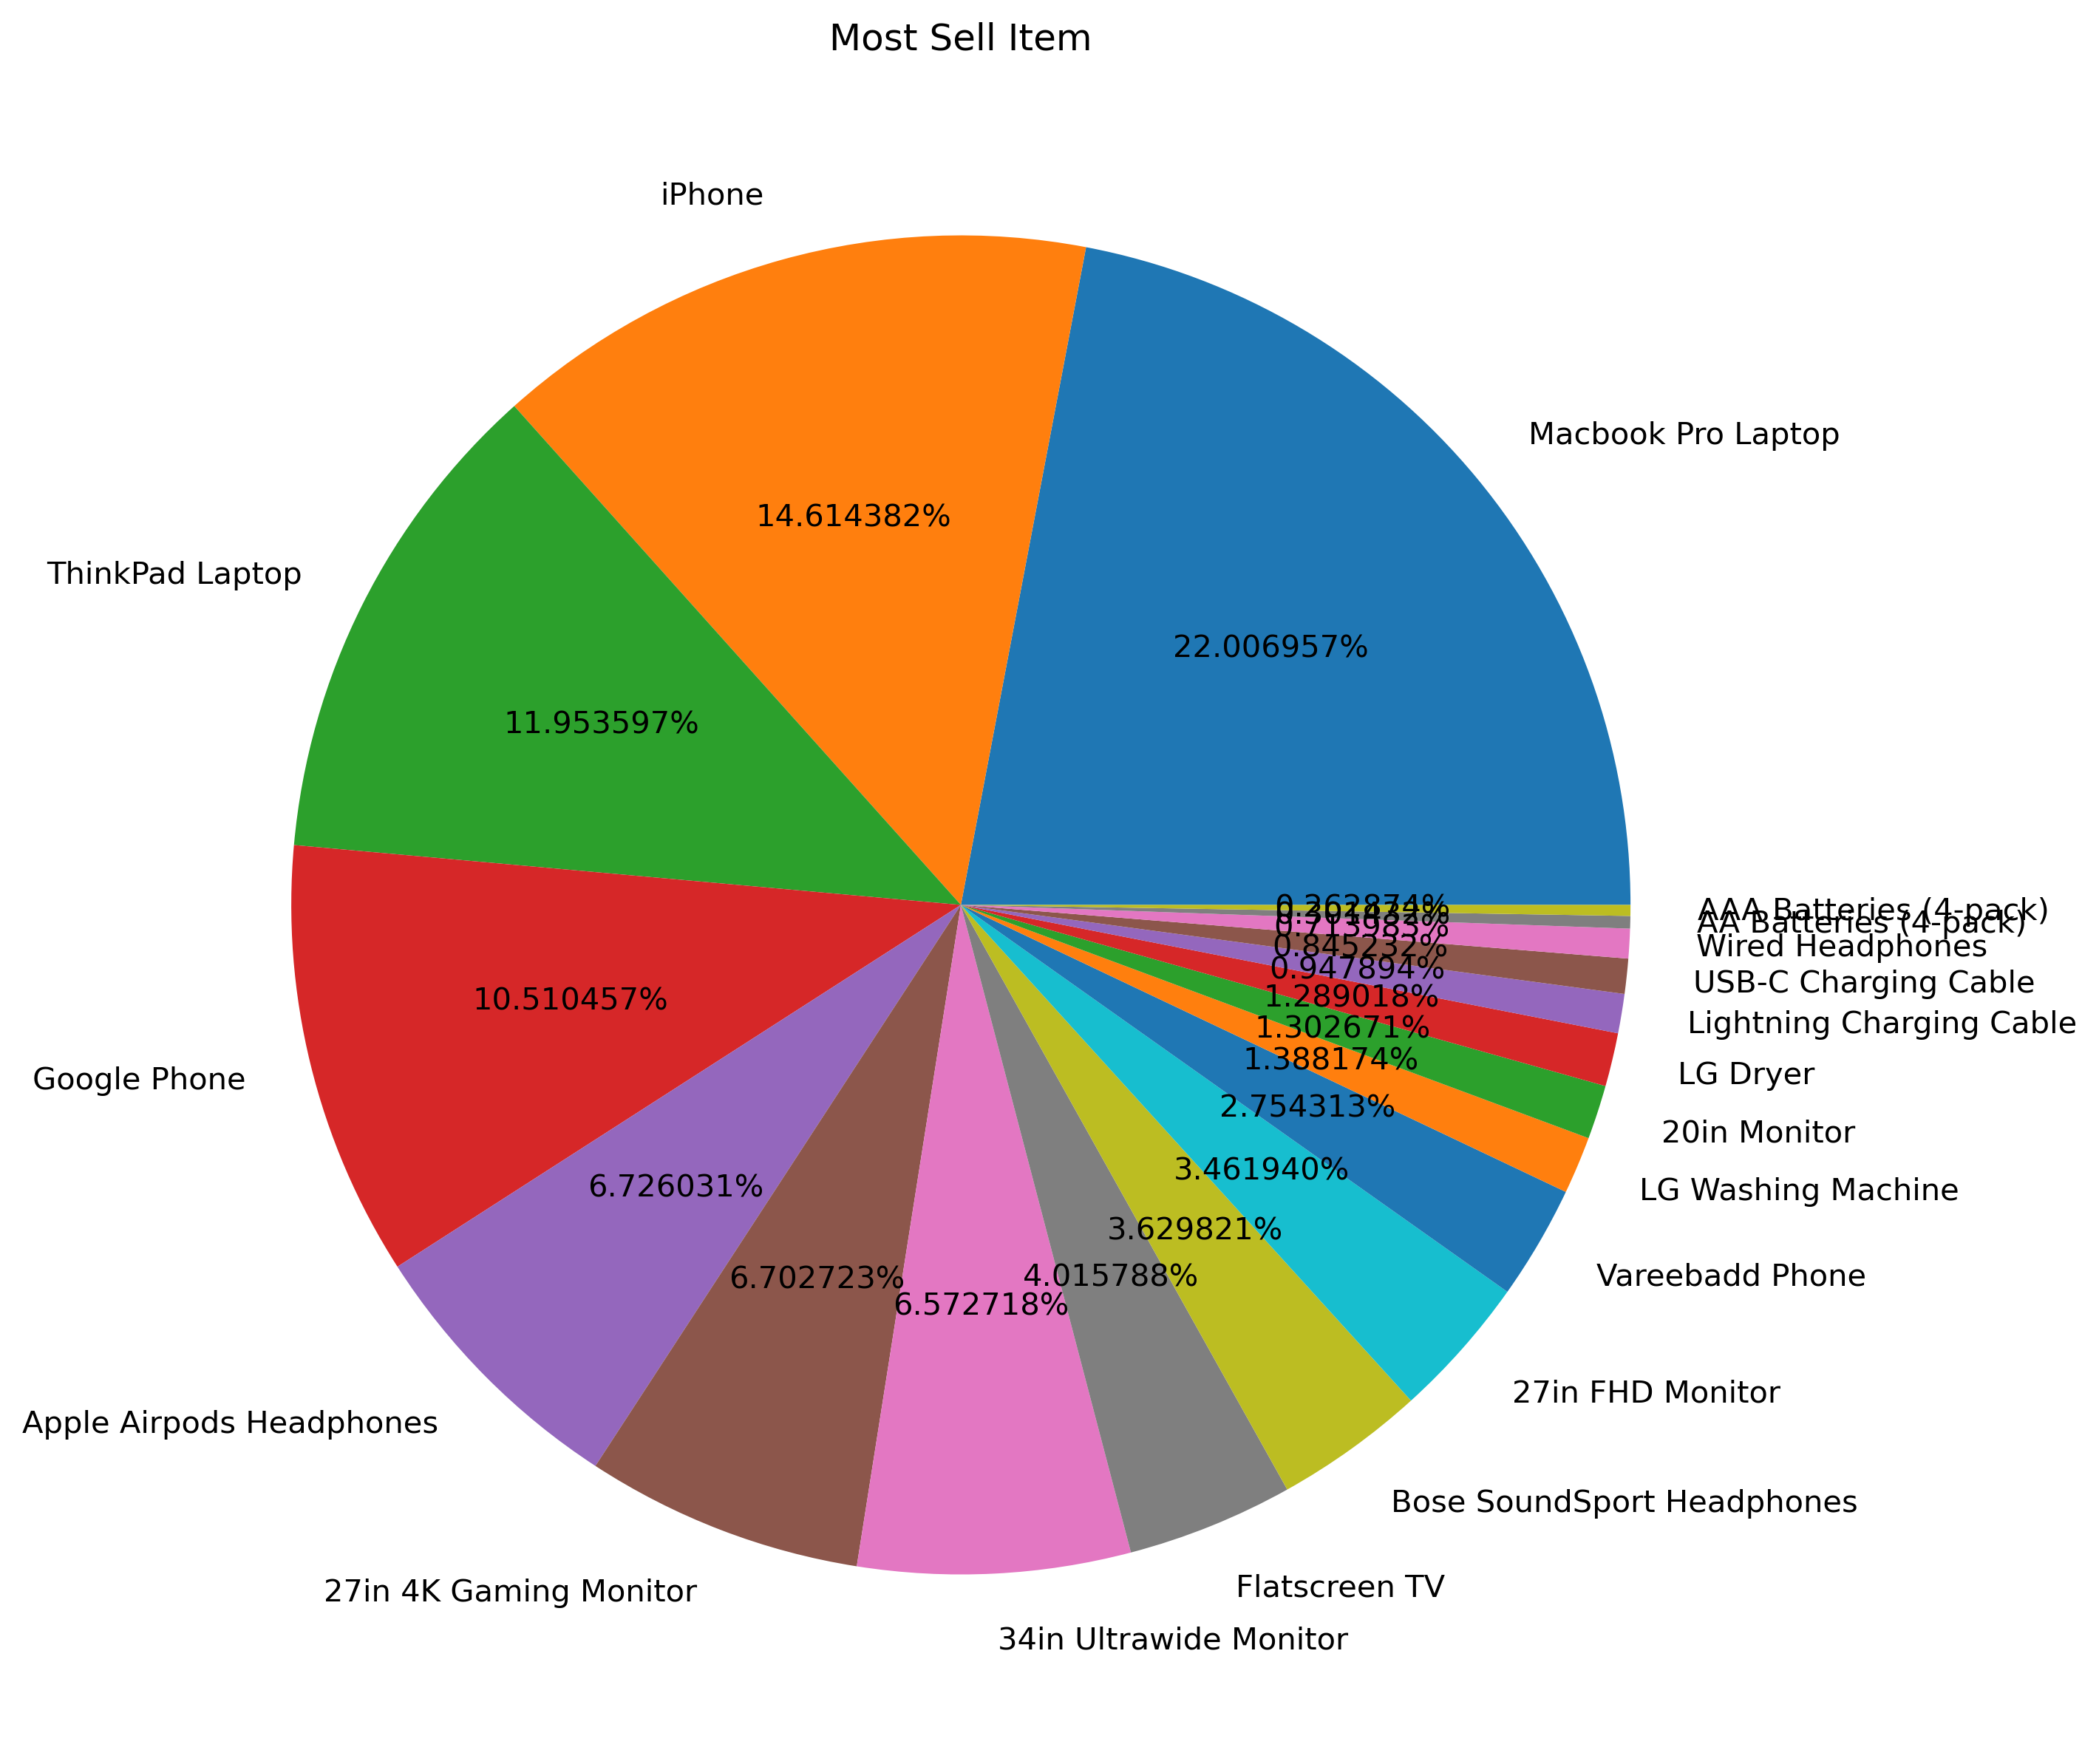

In [89]:

plt.figure(figsize=(10,10),dpi=300)
plt.pie(ans["total_sell"],autopct="%f%%",labels=ans["Product"]);
plt.title("Most Sell Item")




# Average sales for each product per day.

In [123]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sell
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [136]:
average_sales_per_day = df.groupby(['Product'])["Quantity Ordered",'total_sell'].mean()


C:\Users\Believers\AppData\Local\Temp\ipykernel_16220\1984331920.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_sales_per_day = df.groupby(['Product'])["Quantity Ordered",'total_sell'].mean()


In [137]:
average_sales_per_day

,Quantity Ordered,total_sell
Product,,
20in Monitor,1.009390,111.022770
27in 4K Gaming Monitor,1.000000,389.990000
27in FHD Monitor,1.002392,150.348828
34in Ultrawide Monitor,1.003195,381.204026
AA Batteries (4-pack),1.371511,5.266603
AAA Batteries (4-pack),1.475046,4.410388
Apple Airpods Headphones,1.006180,150.927070
Bose SoundSport Headphones,1.004573,100.447271
Flatscreen TV,1.000000,300.000000


# Highest selling products. Which products are sold the most?

In [138]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sell
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [162]:
most_sell=df.groupby("Product").sum().sort_values(by="Quantity Ordered",ascending=False).reset_index()
most_sell.head()

,Product,Quantity Ordered,Price Each,total_sell
0,AAA Batteries (4-pack),1596,3235.18,4772.04
1,AA Batteries (4-pack),1425,3989.76,5472.00
2,USB-C Charging Cable,1284,13993.45,15343.80
3,Lightning Charging Cable,1151,15966.60,17207.45
4,Wired Headphones,1081,12049.95,12961.19


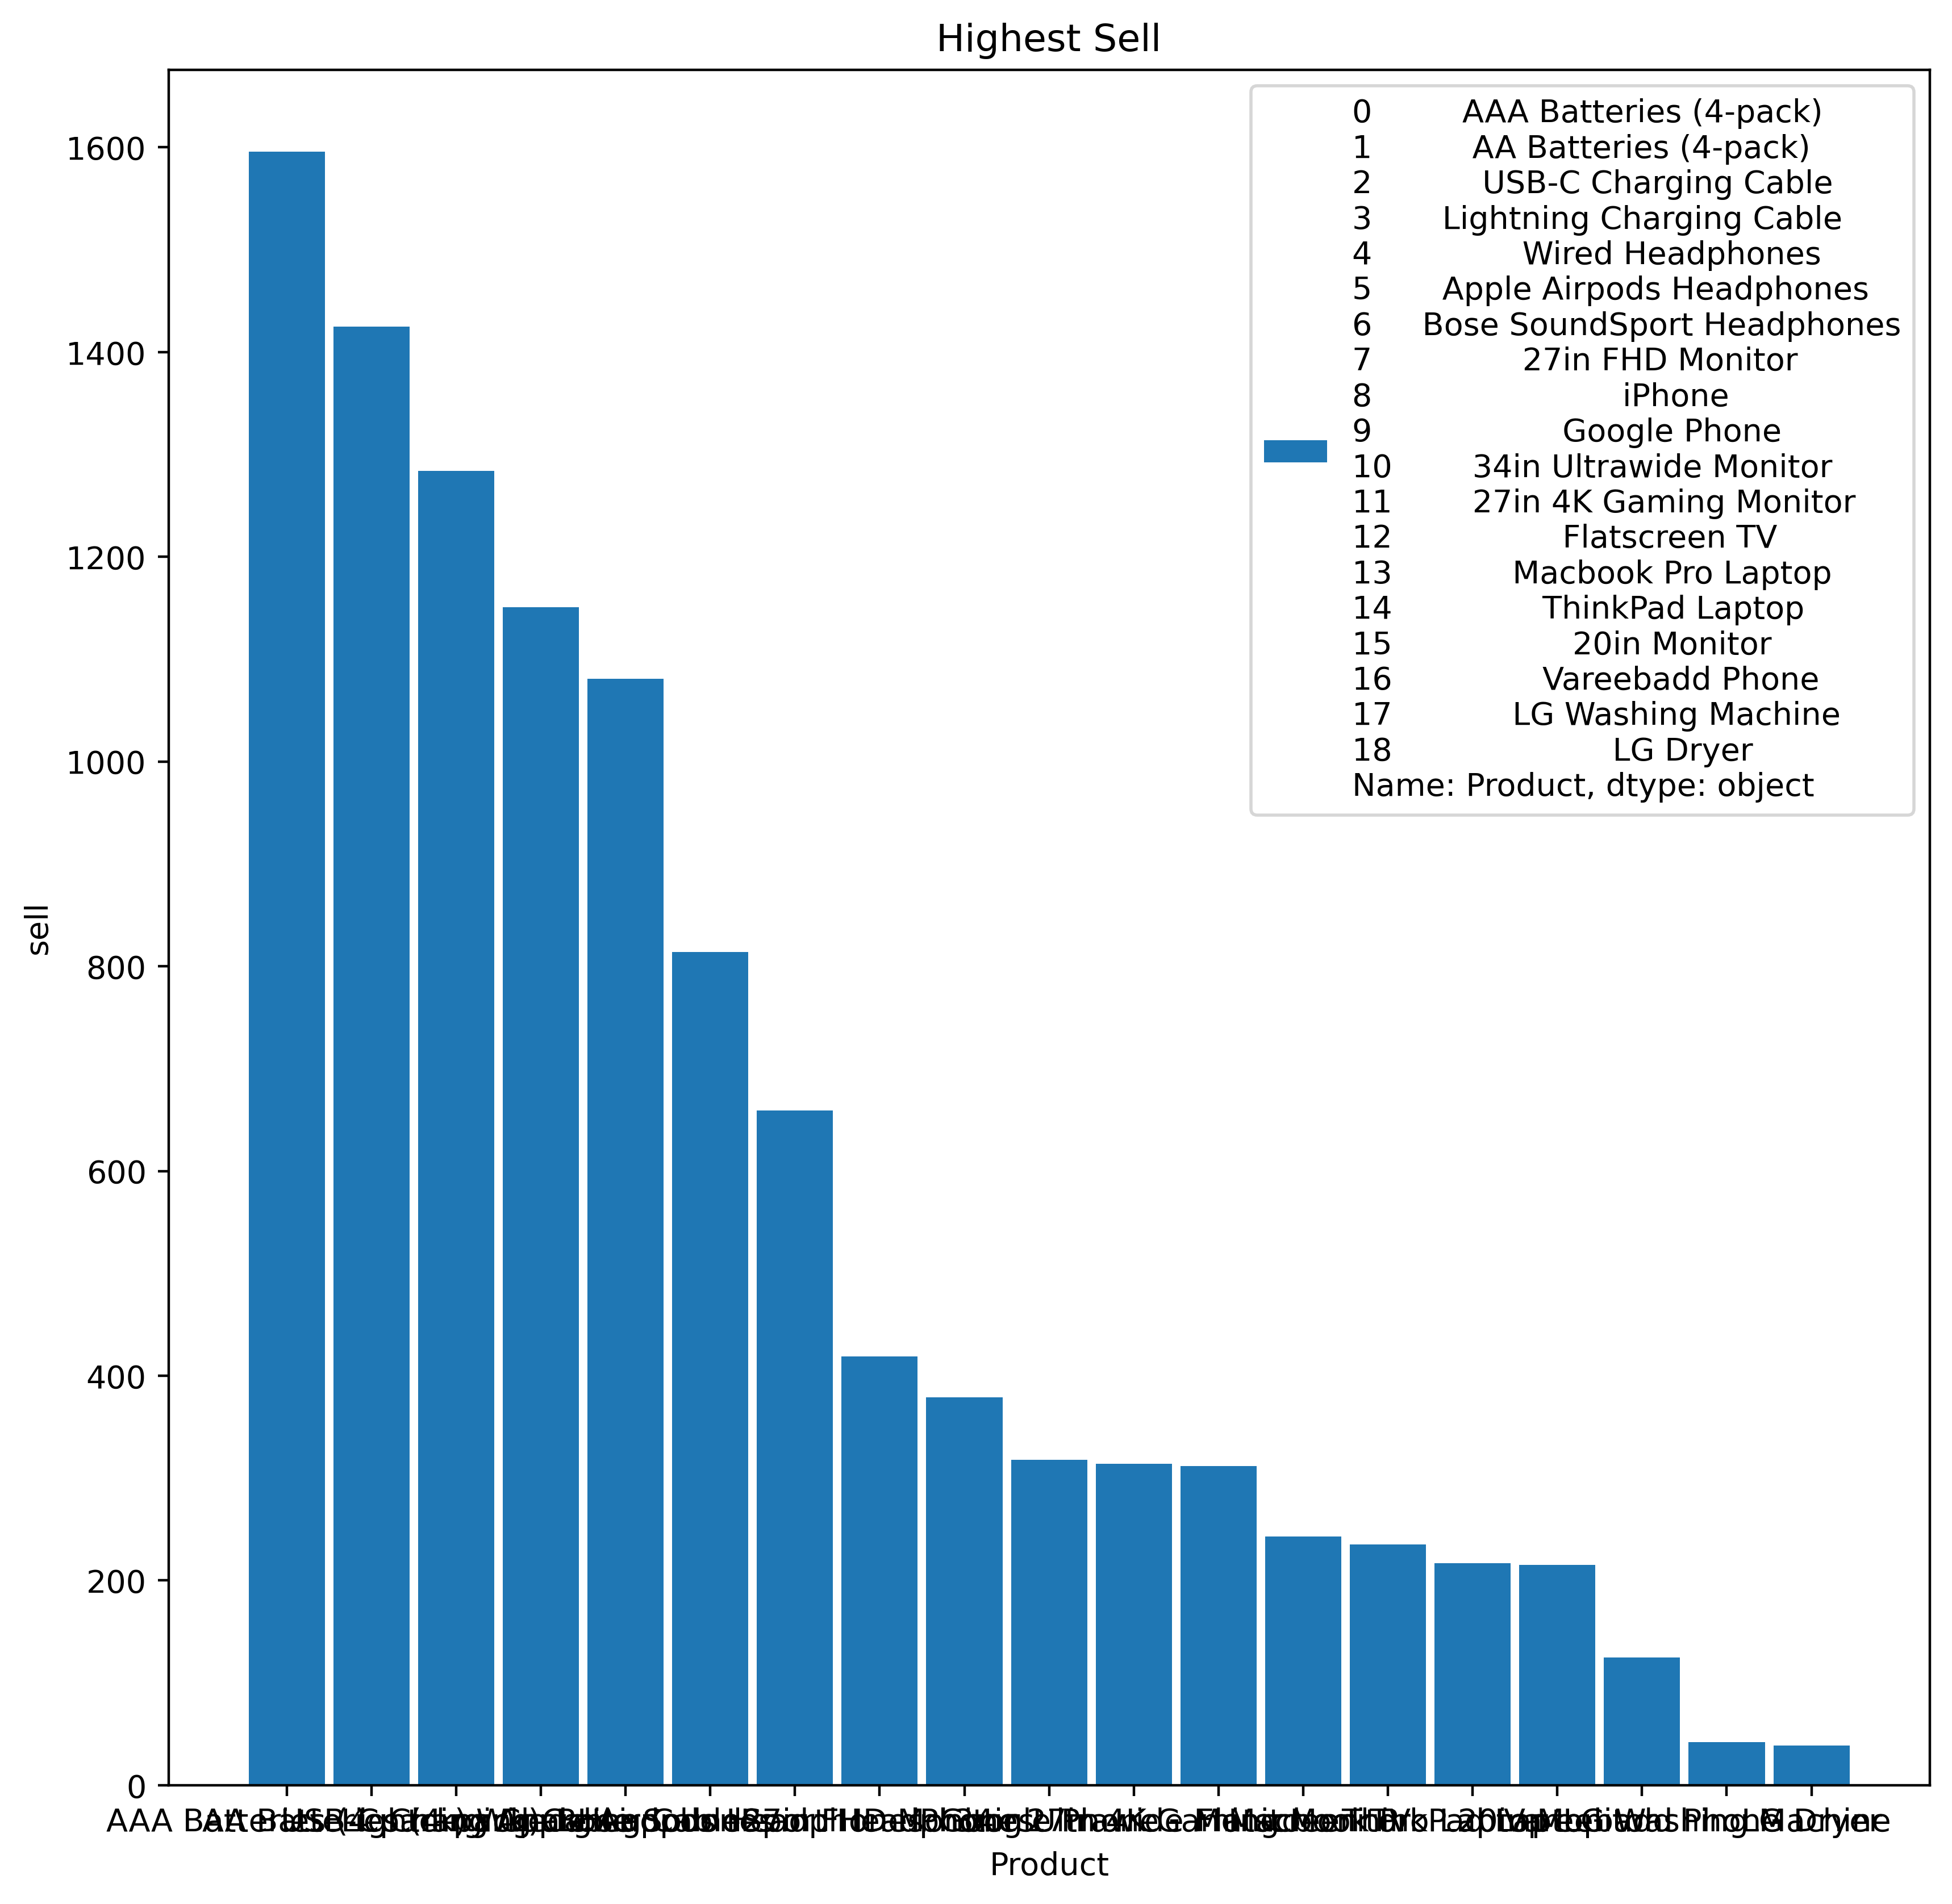

In [161]:
plt.figure(figsize=(10,10),dpi=400)
plt.bar(most_sell["Product"],most_sell['Quantity Ordered'],width=0.9,label=most_sell["Product"])
plt.title("Highest Sell")
plt.xlabel("Product")
plt.ylabel("sell")
plt.legend()


conclusion:most sell product is AAA BATERIES

In [163]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sell
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [202]:
df["city"] = df["Purchase Address"].str.split(",").str.get(1).str.strip()

In [203]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sell,city
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Austin


In [218]:
highest_sell_city=df.groupby("city").sum().sort_values(by="total_sell",ascending=False)
highest_sell_city.head()

highest_sell_city
highest_sell_city.reset_index(inplace=True)

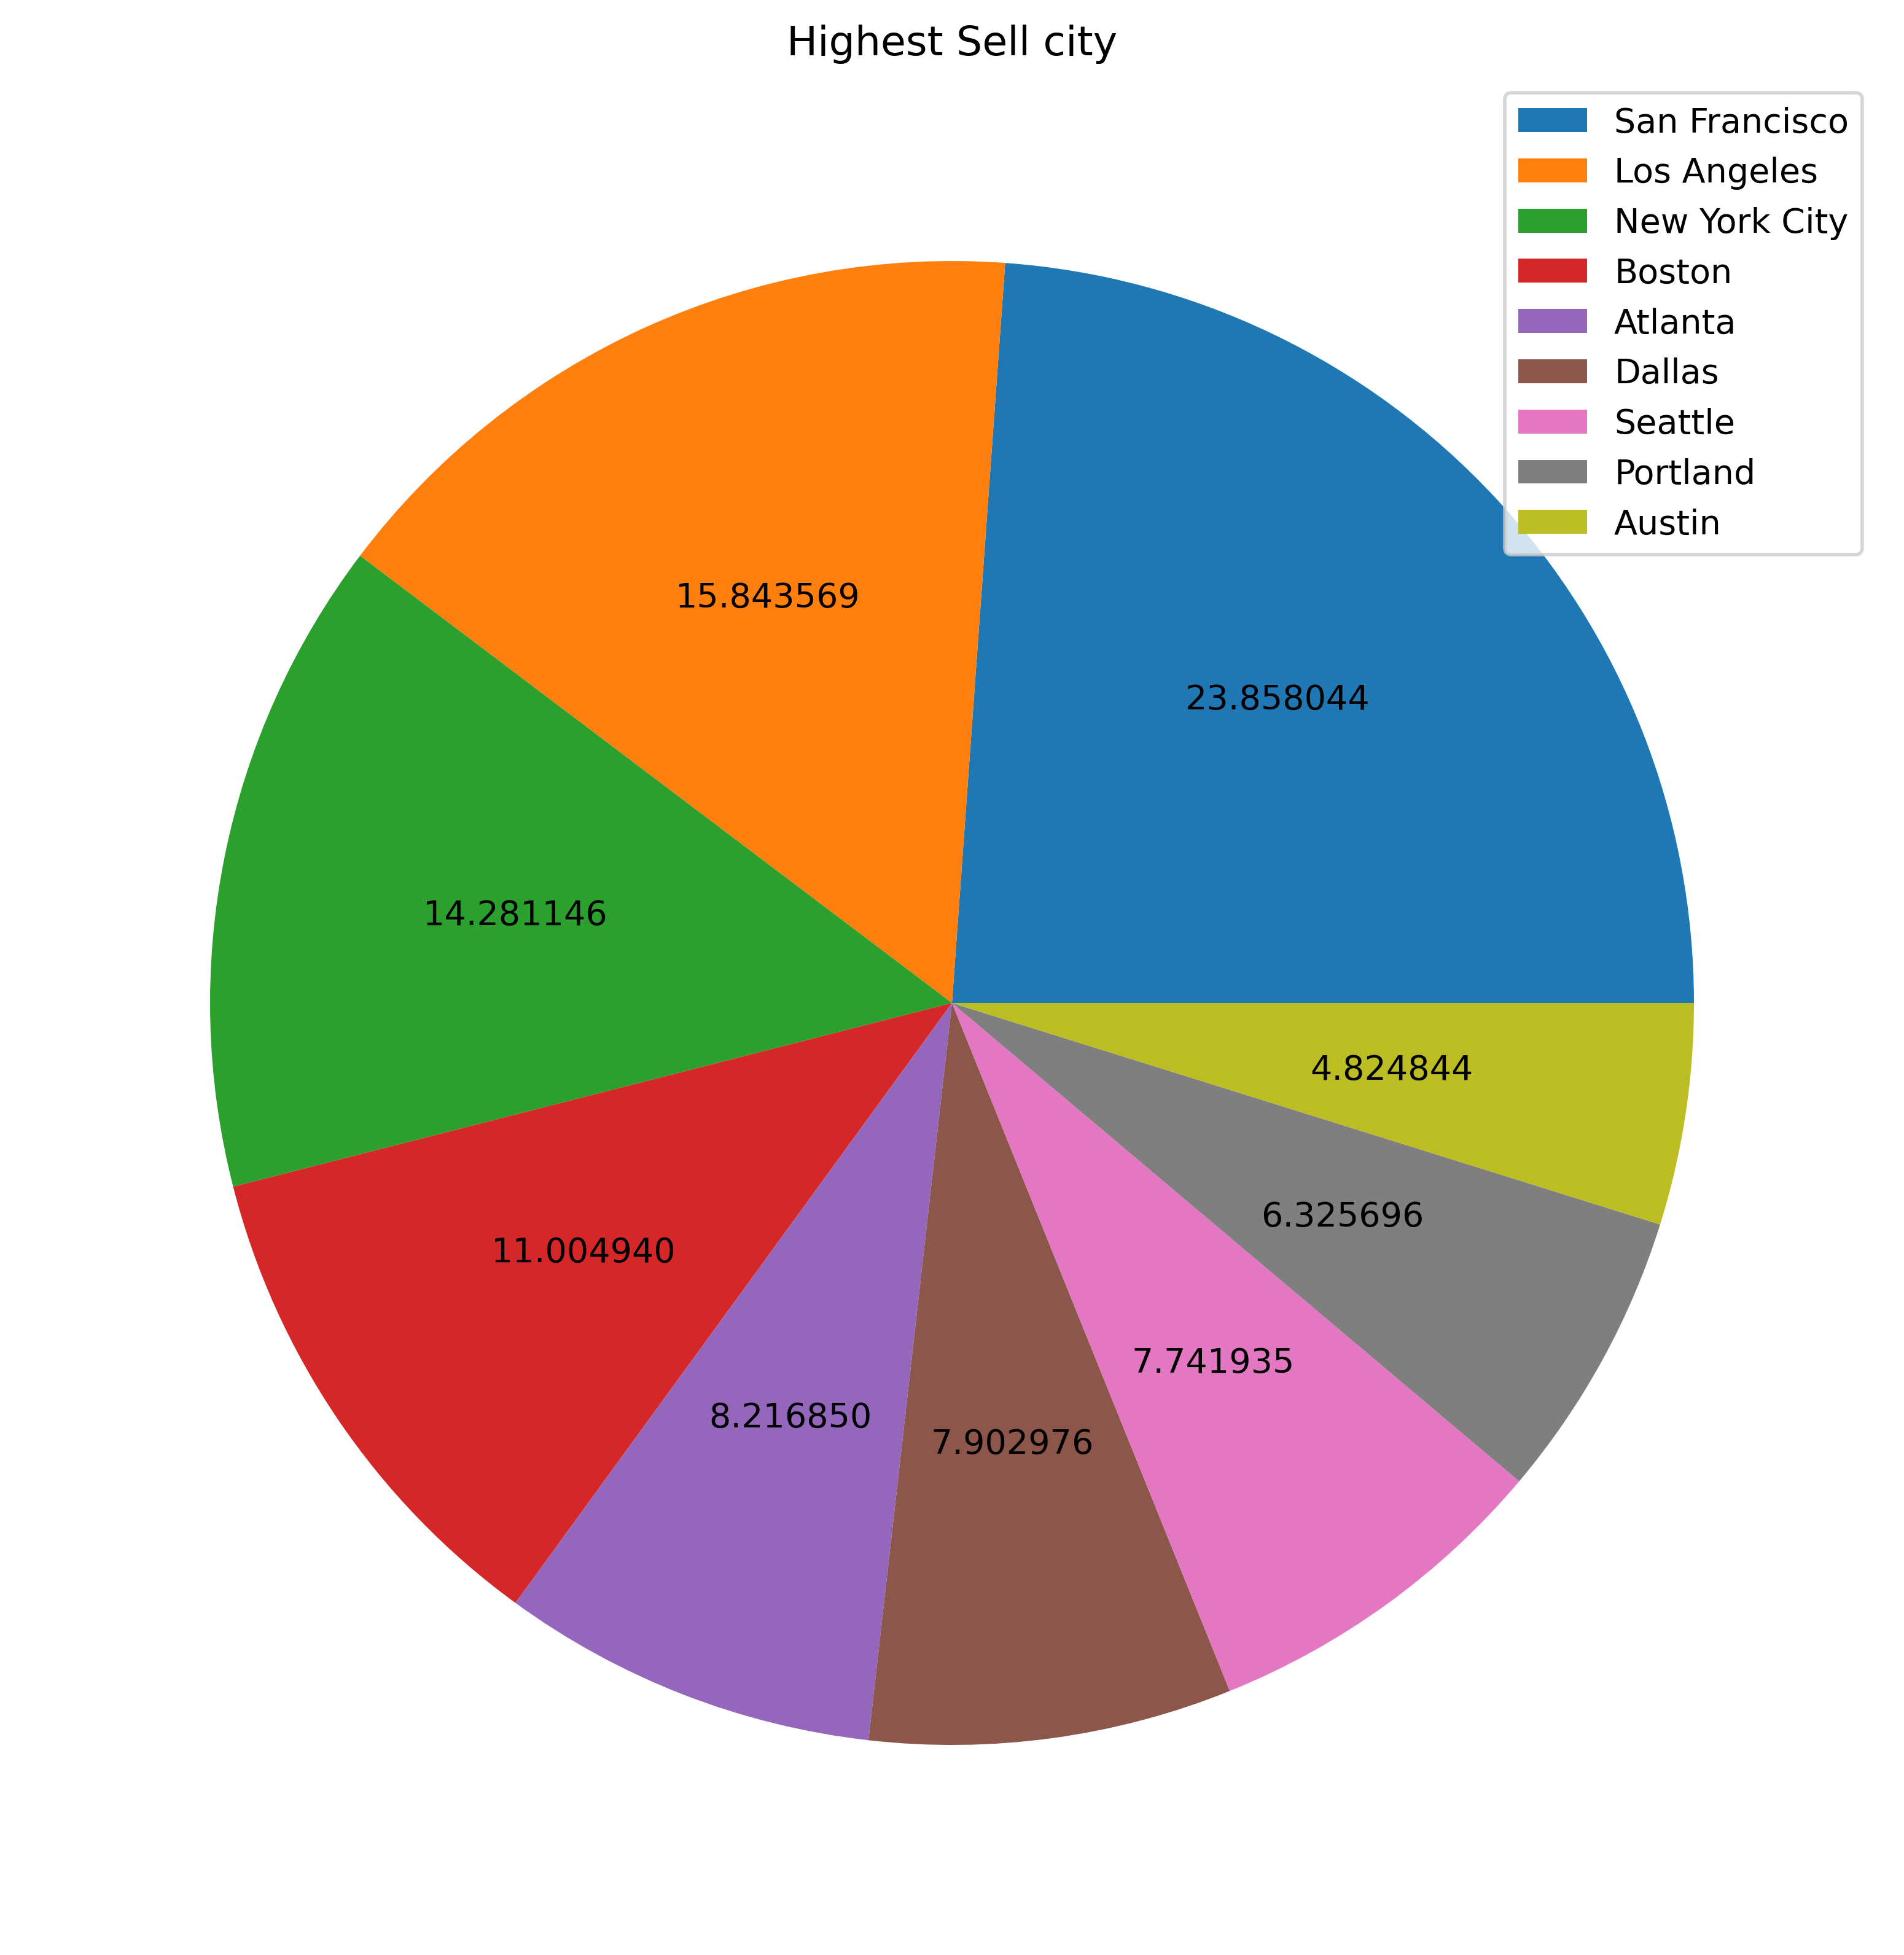

In [222]:
plt.figure(figsize=(10,10),dpi=400)
plt.pie(highest_sell_city["total_sell"],autopct="%f")
plt.title("Highest Sell city")
plt.legend(labels=highest_sell_city["city"])

# most product sell city is #San Francisco